# Examen de Laboratorio Grupo 1

- Nombre: Dimar Gabriel Lopez Chiri

| ID | Nombre | Enlace | Descripción |
|----|--------|--------|-------------|
| 133 | Lopez Chiri Dimar Gabriel | - | - |
| 133 | lol_interpolated_positions | [Link](https://www.kaggle.com/datasets/lawsus/lol-interpolated-positions) | Data Set Para predecir si Habra peleas de equipo dependiendo de la posion de los jugadores |

In [237]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline



In [238]:
# Leer el archivo CSV por pandas y tomar 30000 datos
data = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/datasets/combined_interpolated_data.csv', nrows=100000)


# Verificar que ya no hay valores NaN en el DataFrame
print("Cantidad de NaN por columna después de llenar los datos faltantes:")
print(data.isna().sum())

#data.info()

Cantidad de NaN por columna después de llenar los datos faltantes:
MatchID          0
Time             0
Player1_X        0
Player1_Y        0
Player2_X        0
                ..
Distance_7_10    0
Distance_8_9     0
Distance_8_10    0
Distance_9_10    0
Teamfight        0
Length: 68, dtype: int64


In [239]:
# Division de dataset en entrenamiento y prueba , 67 para X, 68 es y 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MatchID        80000 non-null  object 
 1   Time           80000 non-null  int64  
 2   Player1_X      80000 non-null  float64
 3   Player1_Y      80000 non-null  float64
 4   Player2_X      80000 non-null  float64
 5   Player2_Y      80000 non-null  float64
 6   Player3_X      80000 non-null  float64
 7   Player3_Y      80000 non-null  float64
 8   Player4_X      80000 non-null  float64
 9   Player4_Y      80000 non-null  float64
 10  Player5_X      80000 non-null  float64
 11  Player5_Y      80000 non-null  float64
 12  Player6_X      80000 non-null  float64
 13  Player6_Y      80000 non-null  float64
 14  Player7_X      80000 non-null  float64
 15  Player7_Y      80000 non-null  float64
 16  Player8_X      80000 non-null  float64
 17  Player8_Y      80000 non-null  float64
 18  Pl

In [240]:
# Verificar que valores tiene la columna 'Teamfight'
print(data['Teamfight'].unique())


[0 1]


In [241]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [242]:
# Para los datos de entrenamiento
y = train_data.iloc[:, 67]
X = train_data.iloc[:, 2:67]
m = y.size

# Para los datos de prueba
y_test = test_data.iloc[:, 67]
X_test = test_data.iloc[:, 2:67]
m_test = y_test.size

In [243]:
X

,Player1_X,Player1_Y,Player2_X,Player2_Y,Player3_X,Player3_Y,Player4_X,Player4_Y,Player5_X,Player5_Y,...,Distance_6_7,Distance_6_8,Distance_6_9,Distance_6_10,Distance_7_8,Distance_7_9,Distance_7_10,Distance_8_9,Distance_8_10,Distance_9_10
75220,8960.500000,6598.083333,8154.250000,5280.250000,7742.083333,3478.916667,8379.250000,5670.250000,7786.833333,5147.833333,...,1262.965893,1613.910350,1631.463641,856.150112,456.778248,2785.526085,408.510098,3013.778116,783.427694,2390.560339
48955,6916.666667,7245.833333,7481.250000,7692.500000,5349.583333,9511.166667,6746.750000,7545.166667,6385.833333,7914.166667,...,4985.992145,6928.467817,7828.839559,7812.417644,3812.094505,3024.478900,3091.394995,3062.836359,2810.258529,278.534670
44966,6327.250000,6675.800000,7862.016667,5339.466667,4122.750000,3681.483333,12101.316667,1412.450000,10936.850000,1824.800000,...,6681.238097,3653.893497,6267.018419,12034.499978,3297.152002,9244.487966,5353.722251,8089.645530,8572.703379,13627.497343
13568,10635.000000,4559.000000,10779.000000,5065.000000,10496.000000,5213.000000,10027.000000,4993.000000,10199.000000,4785.000000,...,4258.739720,2235.653372,3509.111568,3544.092126,3967.433679,758.023746,861.267090,3412.103457,3640.819276,335.679907
92727,1108.166667,7788.316667,7952.166667,5491.000000,7000.916667,6766.650000,11543.750000,1913.566667,7124.450000,839.016667,...,2092.480692,6984.895442,8717.969075,12295.481815,5886.328846,6638.844059,10300.710174,6223.971318,7659.408838,4039.217336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1458.050000,4152.050000,1706.350000,2888.450000,2757.450000,2699.450000,3707.400000,618.550000,2543.500000,1840.500000,...,1234.795251,2067.440718,3947.644393,4044.862543,843.512481,2745.923617,2844.122804,2039.239999,2137.035528,98.467977
54886,1624.033333,4958.183333,3510.600000,8090.266667,7874.066667,6694.866667,3080.383333,833.266667,6923.066667,7638.300000,...,7775.585714,7627.726103,12376.857653,13333.701750,993.143809,4639.670456,5829.361830,4793.362482,5724.161817,1728.235964
76820,5849.166667,8391.433333,4423.533333,9436.133333,5291.066667,11427.400000,4057.200000,12326.033333,5528.900000,11507.266667,...,607.905141,1928.201355,2322.347024,4744.560980,2037.921704,2111.297535,4315.879436,1135.230193,3775.208077,2681.936947
860,2444.000000,8834.666667,3763.666667,9794.333333,5312.666667,8607.000000,3693.000000,7899.000000,4165.000000,8128.000000,...,2815.676907,11383.083672,2120.377325,1170.481999,8578.584220,1057.611985,2170.646012,9343.535763,10674.145482,1934.714823


In [244]:
y

75220    1
48955    1
44966    0
13568    0
92727    0
        ..
6265     0
54886    0
76820    1
860      0
15795    0
Name: Teamfight, Length: 80000, dtype: int64

In [245]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [246]:
X_norm, mu, sigma= featureNormalize(X)

In [247]:
X_norm

,Player1_X,Player1_Y,Player2_X,Player2_Y,Player3_X,Player3_Y,Player4_X,Player4_Y,Player5_X,Player5_Y,...,Distance_6_7,Distance_6_8,Distance_6_9,Distance_6_10,Distance_7_8,Distance_7_9,Distance_7_10,Distance_8_9,Distance_8_10,Distance_9_10
75220,1.447500,-0.558401,0.637806,-0.424135,0.368753,-1.105035,0.002191,0.404830,-0.055821,0.100102,...,-1.227515,-1.391151,-1.265467,-1.428158,-1.282646,-0.532685,-1.173668,-0.699361,-1.319485,-0.067264
48955,0.805785,-0.376196,0.398714,0.463248,-0.534978,1.228948,-0.487292,1.030802,-0.484035,1.036260,...,-0.145549,0.303316,0.051747,0.096615,0.036493,-0.456131,-0.320538,-0.681324,-0.590818,-0.869006
44966,0.620723,-0.536540,0.533986,-0.402351,-0.998397,-1.026658,1.118203,-1.016708,0.906976,-1.024449,...,0.347114,-0.740733,-0.280208,1.022071,-0.165956,1.536584,0.398859,1.166864,1.480844,4.198366
13568,1.973252,-1.131974,1.570282,-0.503318,1.409005,-0.434088,0.496247,0.178718,0.681454,-0.022685,...,-0.356899,-1.192918,-0.866385,-0.838977,0.097565,-1.182239,-1.029696,-0.552910,-0.292222,-0.847313
92727,-1.017943,-0.223601,0.566013,-0.346607,0.088789,0.167047,0.951024,-0.849402,-0.258278,-1.358049,...,-0.986446,0.321307,0.240726,1.079277,0.851976,0.701809,1.971950,0.480919,1.152505,0.558579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-0.908088,-1.246444,-1.652894,-1.303995,-1.514119,-1.406624,-1.398601,-1.281765,-1.658438,-1.019136,...,-1.235701,-1.246550,-0.773177,-0.729211,-1.130602,-0.545373,-0.399168,-1.057665,-0.832849,-0.937360
54886,-0.855973,-1.019688,-1.011911,0.609573,0.418608,0.139272,-1.586603,-1.210078,-0.319830,0.942904,...,0.665147,0.526264,1.018401,1.306848,-1.071774,0.061330,0.550107,-0.045068,0.456762,-0.318688
76820,0.470616,-0.053950,-0.687579,1.104671,-0.557082,1.970372,-1.293718,2.626975,-0.745955,2.252205,...,-1.417885,-1.290944,-1.118624,-0.575841,-0.661021,-0.748689,0.068836,-1.390039,-0.243908,0.043345
860,-0.598524,0.070726,-0.922005,1.236440,-0.548923,0.879110,-1.402918,1.148935,-1.162829,1.108624,...,-0.776274,1.723604,-1.161552,-1.359258,1.910434,-1.086260,-0.613327,1.627877,2.236335,-0.240307


In [248]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [249]:
X.shape

(80000, 66)

In [250]:
m, n = X_norm.shape
# Agraga el termino de intercepción a A
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_norm.shape

(80000, 66)

In [251]:
def calcularCostoWithReg(theta, X, y, lambda_):
    m = y.size 

    J = 0
    
    # funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calcular el término de regularización
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Sumar el término de regularización al costo total
    J += regularization_term

    return J

In [252]:
def descensoGradienteWithReg(theta, X, y, alpha, lambda_, num_iters):
   
    m = y.shape[0] 

    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        # Calcula el gradiente descendente sin regularización
        gradient = (1 / m) * X.T.dot(h - y)
        
        # Calcula el término de regularización (excepto para el término de sesgo theta[0])
        regularization_term = (lambda_ / m) * theta[1:]
        
        # theta[0] -= alpha * (1 / m) * np.sum(h - y)
        theta[0] -= alpha * gradient[0]
        theta[1:] -= alpha * (gradient[1:]+ regularization_term)

        # Calcula y guarda el costo en cada iteración
        J_history.append(calcularCostoWithReg(theta, X, y, lambda_))
        
    return theta, J_history

theta calculado por el descenso por el gradiente: [-3.28979174e+00  6.64739050e-04  4.83806769e-02  2.32646475e-02
  1.17541850e-01 -5.97354032e-02  1.59943816e-03  5.77778404e-02
  3.62058556e-02  2.99939921e-02 -2.79008638e-02 -2.52350375e-02
  7.91352417e-02  9.60882193e-02  3.89283839e-02 -9.99125247e-02
 -5.37345442e-02  1.19621698e-01 -1.29014591e-01  8.34325424e-02
 -5.45427766e-02 -9.78929262e-02  2.88481926e-03 -2.30064378e-02
 -6.53764551e-02 -6.19430775e-02 -4.89321441e-02 -3.98077075e-02
 -5.36694274e-02 -1.22917893e-01 -6.59957042e-02 -1.34065743e-01
 -1.66962193e-01 -1.35645825e-01 -1.21223256e-01 -5.35035069e-02
 -1.07831401e-01 -1.33759819e-01 -6.04120419e-02 -7.36624601e-02
 -6.06253505e-02 -4.98731530e-02  2.74858267e-02 -2.27253130e-02
 -6.40042360e-02 -1.13277091e-01 -2.15776428e-02 -8.01476309e-02
 -4.88841472e-02 -1.12243201e-01 -1.02207088e-01 -4.27310507e-02
 -8.02549581e-02 -8.56521975e-03 -4.96087902e-02 -7.87829117e-02
 -7.23845949e-02 -5.15859272e-02 -5.8877

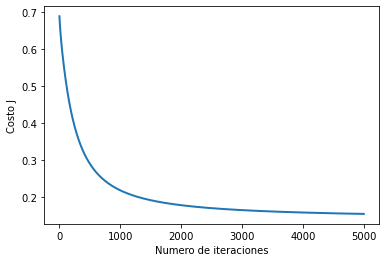

In [254]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 5000
lambda_ = 1000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(67)
theta, J_history = descensoGradienteWithReg(theta, X_norm, y, alpha, lambda_ , num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print(J_history)

In [255]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [256]:
X_test_1 = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)


In [257]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_1:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)


In [258]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test.iloc[0]) * 100))

Precisión de entrenamiento: 97.89 %
